Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data acquisition

In [4]:
variabledef = pd.read_csv("http://bit.ly/VariableDefinitions",index_col=0)
variabledef.head()
Dataset = pd.read_csv("http://bit.ly/FinancialDataset",index_col=None)
Dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
Dataset = pd.read_csv("http://bit.ly/FinancialDataset", index_col=None)
Dataset['country'].head(10)

0    Kenya
1    Kenya
2    Kenya
3    Kenya
4    Kenya
5    Kenya
6    Kenya
7    Kenya
8    Kenya
9    Kenya
Name: country, dtype: object

In [6]:
Dataset.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 1. Exploratory analysis

Tidying the Dataset(missing data, outliers)

In [7]:
Dataset.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [8]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [9]:
Dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
Dataset.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [11]:
# Checking the datatypes
# 
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [12]:
# Checking the Missing Data
Dataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [14]:
# Handling missing variables
Dataset = Dataset.fillna(method='ffill') 
# Fill forward the missing variables

In [15]:
# Dataset without missing variables
Dataset.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [16]:
# Number of unique columns 
Dataset.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [17]:
# Checking for validity of the data
Dataset.head(2)
# All the data fits into the current context and thus was valid

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


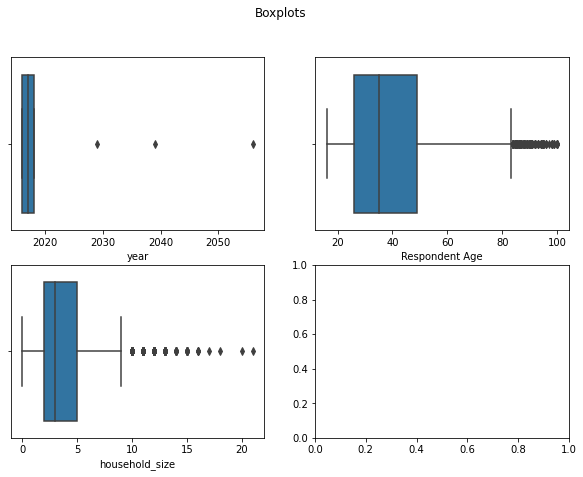

In [18]:
# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4 )) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(Dataset['year'], ax=ax1)

sns.boxplot(Dataset['Respondent Age'], ax=ax2)
sns.boxplot(Dataset['household_size'], ax=ax3)
plt.show()


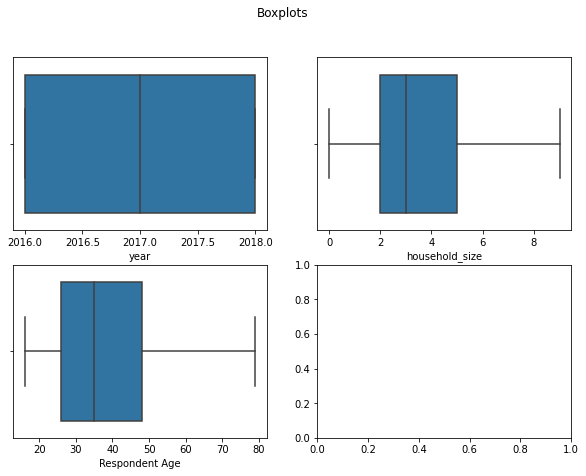

In [20]:
# Box plots without outliers
fig, ((ax1, ax2), (ax3, ax4 )) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(Dataset[Dataset['year'] < 2020]['year'], ax=ax1)
sns.boxplot(Dataset[Dataset['household_size'] < 10]['household_size'], ax=ax2)
sns.boxplot(Dataset[Dataset['Respondent Age'] < 80]['Respondent Age'], ax=ax3)
plt.show()

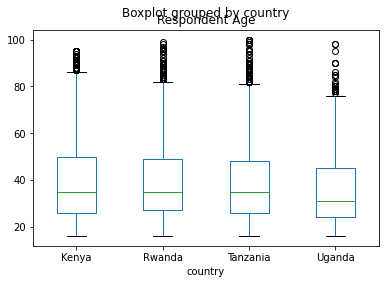

In [21]:
# Checking for outliers by different parameters like country
Dataset.boxplot(column =['Respondent Age'], by ='country', grid=False)

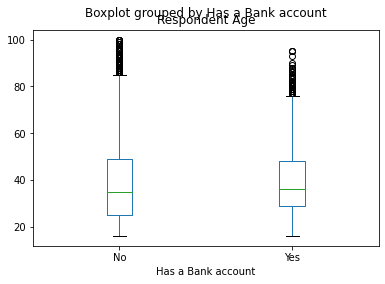

In [22]:
Dataset.boxplot(column =['Respondent Age'], by ='Has a Bank account', grid=False)

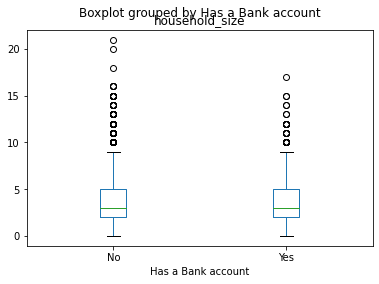

In [23]:
Dataset.boxplot(column =['household_size'], by ='Has a Bank account', grid=False)

In [24]:
# Removing the outliers data
Dataset[Dataset['year'] < 2020]
Dataset[Dataset['household_size'] < 10]
Dataset[Dataset['Respondent Age'] < 80]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# Checking for Anomalies

q1_3, q3_3 = np.percentile(Dataset['year'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_3 - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)

print(iqr)

2.0


# 2. Univariate analysis

In [25]:
Dataset.tail(1)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


### 2.1 measures of central tendancies

In [30]:
## measures of central tendancies
Dataset['household_size'].mean()
Dataset['Respondent Age'].mean()

Dataset['household_size'].median()
Dataset['Respondent Age'].median()

Dataset['household_size'].mode()
Dataset['Respondent Age'].mode()

0    30.0
dtype: float64

### 2.2 Measures of dispersion

In [29]:
## Measures of dispersion
Dataset['household_size'].std()
Dataset['Respondent Age'].std()

Dataset['household_size'].var()
Dataset['Respondent Age'].var()

Dataset['household_size'].max()
Dataset['Respondent Age'].max()

Dataset['household_size'].min()
Dataset['Respondent Age'].min()

Range_household_size = Dataset['household_size'].max() - Dataset['household_size'].min()
Range_respondent_age = Dataset['Respondent Age'].max() - Dataset['Respondent Age'].min()

#Quantiles
Dataset['household_size'].quantile([0.25,0.5,0.75])
Dataset['Respondent Age'].quantile([0.25,0.5,0.75])

# Skewness
Dataset['household_size'].skew()
Dataset['Respondent Age'].skew()

#Kurtosis

Dataset['household_size'].kurt()
Dataset['Respondent Age'].kurt()

# summary statistics 
Dataset['household_size'].describe()
Dataset['Respondent Age'].describe()



count    23524.000000
mean        38.796803
std         16.516396
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

### 2.3 Visualization

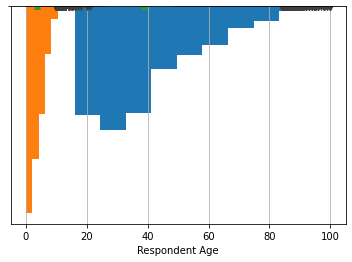

In [31]:
### Visualization 
# box plot
sns.boxplot(Dataset['household_size'], showmeans=True)
sns.boxplot(Dataset['Respondent Age'], showmeans=True)

## plotting histograms
Dataset['Respondent Age'].hist()
Dataset['household_size'].hist()

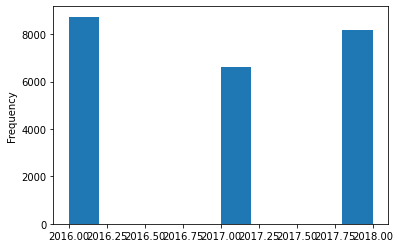

In [32]:
# Plotting histograms
Dataset[Dataset['year'] < 2020]['year'].plot.hist()

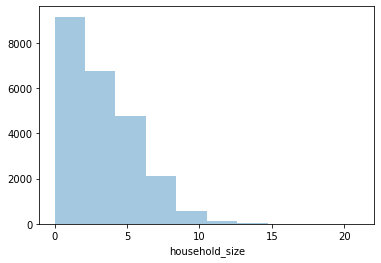

In [33]:
sns.distplot(Dataset.household_size.dropna(), kde=False, bins = 10);

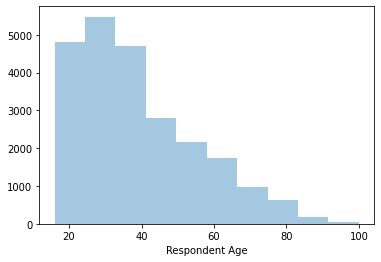

In [34]:
sns.distplot(Dataset['Respondent Age'].dropna(), kde=False, bins = 10)

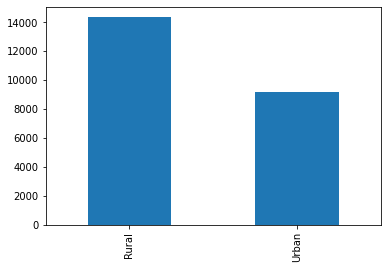

In [35]:
# Bar graphs
Dataset['Type of Location'].value_counts().plot.bar()

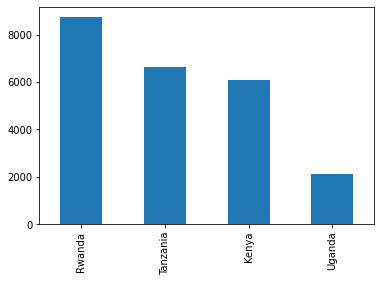

In [36]:
Dataset['country'].value_counts().plot.bar()

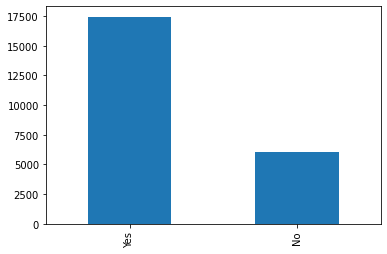

In [ ]:
Dataset['Cell Phone Access'].value_counts().plot.bar()

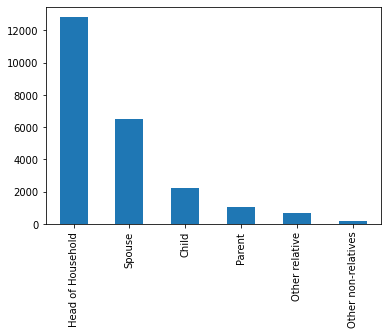

In [ ]:
Dataset['The relathip with head'].value_counts().plot.bar()


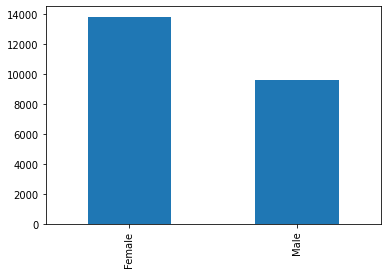

In [ ]:
Dataset['gender_of_respondent'].value_counts().plot.bar()


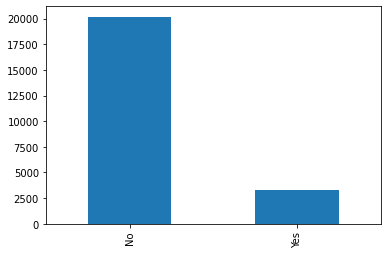

In [ ]:
Dataset['Has a Bank account'].value_counts().plot.bar()


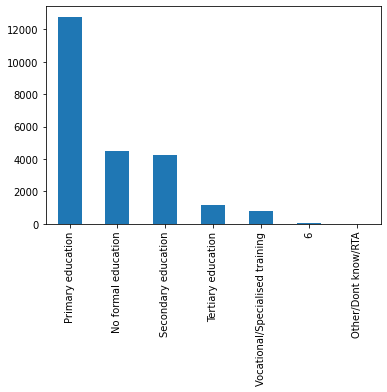

In [ ]:
Dataset['Level of Educuation'].value_counts().plot.bar()


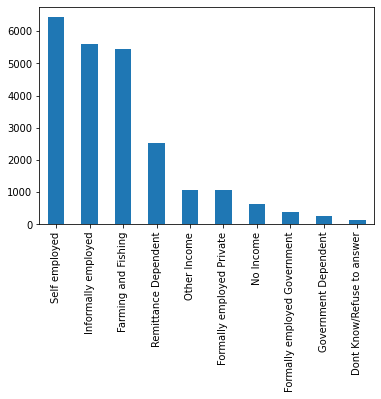

In [ ]:
Dataset['Type of Job'].value_counts().plot.bar()


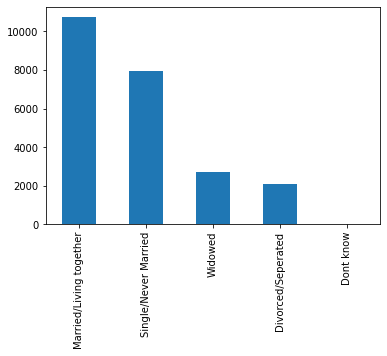

In [ ]:
Dataset['marital_status'].value_counts().plot.bar()

In [37]:
Dataset.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [41]:
## categorical variables is with a frequency table. 
Dataset['The relationship with head']value_counts()
Dataset['gender_of_respondent'].value_counts()
Dataset['Cell Phone Access']value_counts()
Dataset['Type of Location'].value_counts()
Dataset['Has a Bank account'].value_counts()
Dataset['Level of Educuation'].value_counts()
Dataset['Type of Job']value_counts()
Dataset['marital_status'].value_counts()



SyntaxError: ignored

# 3. Bivariate analysis

### 3.1 Numerical & Numerical

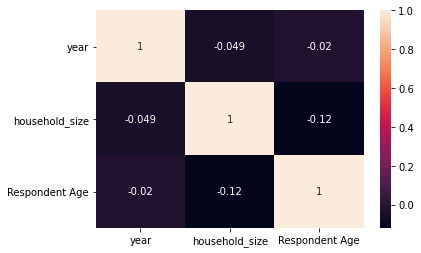

In [ ]:
# Correlation
sns.heatmap(Dataset.corr(),annot=True)
plt.show()

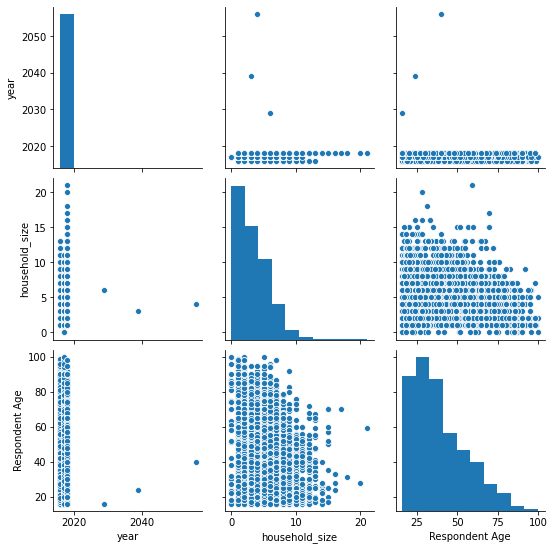

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(Dataset)
plt.show()

### 3.2  Categorical & Categorical

In [ ]:
Dataset.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
countries       = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda']

X = [countries for country in countries]



In [ ]:
Stacked Column Chart
Chi-square Test
Combination Chart

### 3.3 Categorical & Numerical

In [ ]:
Line Chart with Error Bars
Combination Chart
 		
Z-test and t-test
Analysis of Variance (ANOVA)

In [ ]:
Dataset.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


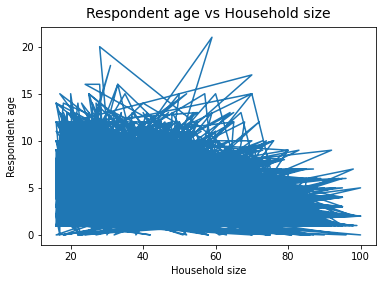

In [ ]:
## Line graphs
# Plotting our line graph
plt.plot(Dataset['Respondent Age'], Dataset['household_size'])

# Giving a title to our line graph
plt.title("Respondent age vs Household size", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Respondent age')

# Labelling the x-axis
plt.xlabel('Household size')

# Displaying our graph
plt.show()

In [ ]:
## Z test
from scipy import stats

a = np.array(Dataset['household_size'])
stats.zscore(a)

b = np.array(Dataset['Respondent Age'])
stats.zscore(b)

array([nan, nan, nan, ..., nan, nan, nan])

# 4. Multivariate analysis

### 4.1 PCA

In [ ]:
Dataset.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
